In [1]:
import os#list the files
import pandas as pd
filelist = os.listdir('30_speakers_train') #read them into pandas
train_df = pd.DataFrame(filelist)

In [2]:
filelist2=os.listdir('30_speakers_test')
test_df=pd.DataFrame(filelist2)
filelist1=os.listdir('30_speakers_val')
val_df=pd.DataFrame(filelist1)

In [3]:
# Renaming the column name to file
train_df = train_df.rename(columns={0:'file'})

In [4]:
test_df = test_df.rename(columns={0:'file'})
val_df=val_df.rename(columns={0:'file'})

In [5]:
df=train_df

In [6]:
df2=test_df
df1=val_df

In [7]:
speaker = []
for i in range(0, len(df)):
    speaker.append(df['file'][i].split('_')[0])# We now assign the speaker to a new column 
train_df['speaker'] = speaker

In [8]:
speaker2 = []
for i in range(0, len(df2)):
    speaker2.append(df2['file'][i].split('_')[0])# We now assign the speaker to a new column 
test_df['speaker'] = speaker2
speaker1 = []
for i in range(0, len(df1)):
    speaker1.append(df1['file'][i].split('_')[0])# We now assign the speaker to a new column 
val_df['speaker'] = speaker1

In [9]:
train_df.head()

,file,speaker
0,1_jag1.wav,1
1,1_jag2.wav,1
2,2_mad2.wav,2
3,2_mad8.wav,2
4,2_mad4.wav,2


In [10]:
test_df.head()


,file,speaker
0,1_salosh jagathi text.wav,1
1,2_art5.wav,2
2,1_art4.wav,1
3,2_art4.wav,2


In [11]:
val_df.head()

,file,speaker
0,1_art1.wav,1
1,1_art5.wav,1
2,2_limesh madhu.wav,2
3,2_sethunath madhu text.wav,2
4,1_art3.wav,1


In [12]:
speaker1

['1', '1', '2', '2', '1']

In [13]:
import librosa

In [14]:
speaker2

['1', '2', '1', '2']

In [15]:
import numpy as np

In [16]:
speaker

['1', '1', '2', '2', '2', '1', '2']

In [17]:
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_train')+'/'+str(files.file))# Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')# Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)# Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))# Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)# Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)# Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs, chroma, mel, contrast, tonnetz

In [18]:
train_features = train_df.apply(extract_features, axis=1)

/tmp/ipykernel_61582/408726490.py:10: FutureWarning: Pass y=[-0.02112532 -0.01022159  0.02188343 ... -0.05313709 -0.05747665
 -0.05675118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_61582/408726490.py:10: FutureWarning: Pass y=[-0.01086866 -0.01807074 -0.01785042 ...  0.00071412  0.00023112
 -0.00020779] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_61582/408726490.py:10: FutureWarning: Pass y=[ 0.01007202  0.01660508  0.0150443  ... -0.00170103 -0.00163564
 -0.00183055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Compute

In [19]:
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_test')+'/'+str(files.file))# Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')# Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)# Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))# Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)# Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)# Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs, chroma, mel, contrast, tonnetz

In [20]:
test_features = test_df.apply(extract_features, axis=1)

/tmp/ipykernel_61582/450195430.py:10: FutureWarning: Pass y=[0.02863772 0.02976267 0.01891872 ... 0.01228474 0.0081278  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_61582/450195430.py:10: FutureWarning: Pass y=[0.         0.         0.         ... 0.5482507  0.55819994 0.5648272 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_61582/450195430.py:10: FutureWarning: Pass y=[-7.7485689e-05 -1.2691210e-04 -1.4269137e-04 ...  1.3589581e-04
  1.6330191e-04  1.0213903e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Com

In [21]:
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_val')+'/'+str(files.file))# Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')# Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)# Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))# Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)# Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)# Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs, chroma, mel, contrast, tonnetz

In [22]:
val_features = val_df.apply(extract_features, axis=1)

/tmp/ipykernel_61582/687691774.py:10: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00960255 -0.0200817
 -0.0347519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_61582/687691774.py:10: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08349159 -0.01874127
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_61582/687691774.py:10: FutureWarning: Pass y=[-0.00030134 -0.00058116 -0.0005677  ...  0.00421901  0.00411922
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes

In [23]:
train_features

0    ([-321.07983, 172.8155, -15.464659, 11.459026,...
1    ([-339.26184, 156.0067, -9.0270405, 9.708056, ...
2    ([-292.545, 155.12129, 6.561417, 10.286829, 14...
3    ([-303.78375, 157.14973, 2.0510392, 8.021465, ...
4    ([-296.25235, 151.6041, 13.254997, 9.193894, 1...
5    ([-226.9727, 135.21538, -57.505436, 30.011282,...
6    ([-298.9572, 144.76236, -10.598823, 11.213219,...
dtype: object

In [24]:
test_features

0    ([-239.20218, 112.5507, -40.488876, 53.773636,...
1    ([-181.14233, 96.90158, -21.328564, 32.591354,...
2    ([-394.40784, 94.93057, 5.9171505, 28.130718, ...
3    ([-254.56473, 85.49958, -43.78918, 46.116146, ...
dtype: object

In [25]:
features_train = []
for i in range(0, len(train_features)):
    features_train.append(np.concatenate((
        train_features[i][0],
        train_features[i][1], 
        train_features[i][2], 
        train_features[i][3],
        train_features[i][4]), axis=0))
        

In [26]:
features_test = []
for i in range(0, len(test_features)):
    features_test.append(np.concatenate((
        test_features[i][0],
        test_features[i][1], 
        test_features[i][2], 
        test_features[i][3],
        test_features[i][4]), axis=0))

In [27]:
features_val = []
for i in range(0, len(val_features)):
    features_val.append(np.concatenate((
        val_features[i][0],
        val_features[i][1], 
        val_features[i][2], 
        val_features[i][3],
        val_features[i][4]), axis=0))

In [28]:
features_train

[array([-3.21079834e+02,  1.72815506e+02, -1.54646587e+01,  1.14590263e+01,
        -1.49750918e-01, -4.55955648e+00, -8.49665737e+00, -9.44304562e+00,
        -7.09839725e+00, -1.41783524e+00, -7.17923737e+00,  2.44702235e-01,
        -2.52822852e+00, -6.42702389e+00,  6.92194557e+00, -4.74343729e+00,
        -3.56305861e+00,  1.62839413e+00, -5.74531317e+00, -1.79141545e+00,
        -2.83420253e+00, -1.89622629e+00, -2.69427252e+00, -2.59905648e+00,
         1.00639391e+00, -4.08205795e+00, -1.79677498e+00, -1.89036632e+00,
        -3.38318443e+00, -2.93183565e+00, -1.56774139e+00, -2.74755549e+00,
        -4.37407303e+00, -2.28872395e+00, -3.82555008e+00, -2.57547545e+00,
        -2.41742015e+00, -1.80117130e+00, -1.02299377e-01,  7.56966546e-02,
         5.83139479e-01,  5.58641076e-01,  5.56529641e-01,  5.66061735e-01,
         5.86632550e-01,  5.80933154e-01,  5.37630796e-01,  5.17913222e-01,
         5.26700974e-01,  5.50033629e-01,  5.60203314e-01,  5.74983597e-01,
         1.7

In [29]:
features_test

[array([-2.39202179e+02,  1.12550697e+02, -4.04888763e+01,  5.37736359e+01,
        -1.96039810e+01,  1.52271080e+01, -8.59613609e+00, -4.31140757e+00,
        -7.39022732e+00, -2.81390262e+00,  1.18154068e+01, -6.91315603e+00,
         9.59781647e+00, -9.22467351e-01,  7.25383186e+00, -4.14588630e-01,
        -2.62012243e+00,  4.66368484e+00, -1.97386730e+00,  1.06279361e+00,
         4.13357496e+00,  7.43250847e+00,  2.87652254e+00,  7.56367159e+00,
         2.01890779e+00,  4.30755234e+00,  3.84010434e+00,  2.29155397e+00,
         4.03702307e+00, -2.54306912e+00,  2.09694028e+00,  2.25975383e-02,
         2.18090081e+00, -1.75990641e-01,  1.72974497e-01, -2.32197151e-01,
        -9.88874912e-01,  2.61882091e+00, -3.71288800e+00,  5.69822907e-01,
         5.67944646e-01,  5.50924182e-01,  5.59888780e-01,  5.98236382e-01,
         6.24463618e-01,  6.05045736e-01,  5.52448690e-01,  5.52308321e-01,
         5.70469499e-01,  5.55122554e-01,  5.26316106e-01,  5.55864275e-01,
         1.1

In [30]:
X_train = np.array(features_train)

In [31]:
X_test = np.array(features_test)

In [32]:
X_val = np.array(features_val)

In [33]:
y_train = np.array(train_df['speaker'])
y_val = np.array(val_df['speaker'])

In [34]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical# Hot encoding y
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_val = to_categorical(lb.fit_transform(y_val))

2022-12-17 20:57:09.000730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping# Build a simple dense model with early stopping and softmax for categorical classification, remember we have 30 classes
model = Sequential()
model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')
model.summary()

2022-12-17 20:58:12.654835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 20:58:12.753082: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 193)               37442     
                                                                 
 dropout (Dropout)           (None, 193)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               24832     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [37]:
history = model.fit(X_train, y_train, batch_size=256, epochs=100, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7147 - accuracy: 0.4286 - val_loss: 12.3350 - val_accuracy: 0.6000
Epoch 2/100
1/1 [==============================] - 0s 132ms/step - loss: 0.6014 - accuracy: 0.5714 - val_loss: 0.6272 - val_accuracy: 0.8000
Epoch 3/100
1/1 [==============================] - 0s 91ms/step - loss: 0.4566 - accuracy: 0.8571 - val_loss: 0.3867 - val_accuracy: 0.8000
Epoch 4/100
1/1 [==============================] - 0s 107ms/step - loss: 0.3562 - accuracy: 1.0000 - val_loss: 0.2104 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 116ms/step - loss: 0.2398 - accuracy: 1.0000 - val_loss: 0.1164 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 128ms/step - loss: 0.1439 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 138ms/step - loss: 0.2078 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 8/100
1/1 

In [38]:
import matplotlib.pyplot as plt

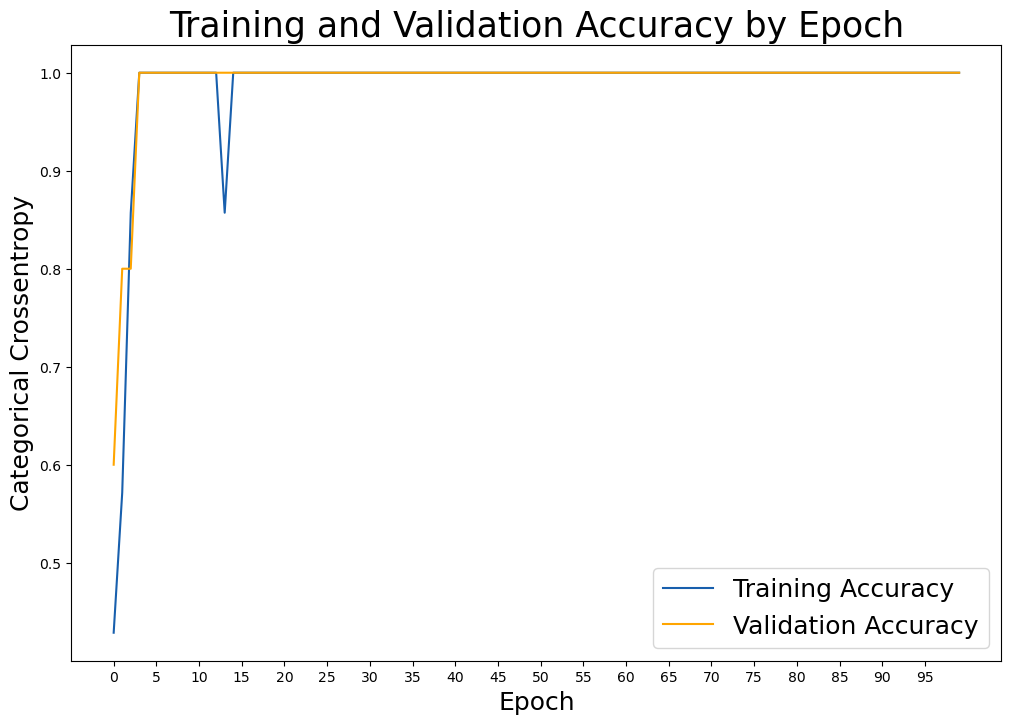

In [39]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']# Set figure size.
plt.figure(figsize=(12, 8))# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);

In [40]:
X_test

array([[ 1.78424712e+00, -3.78457317e+00, -1.41054410e+00,
         5.77012355e+00, -2.10303881e+00,  8.08044778e-01,
         7.63221360e-01,  3.48300807e-01,  2.16811387e-01,
        -3.15453561e-01,  4.94358874e+00, -1.79941042e+00,
         8.36634972e+00,  3.66321585e+00,  7.37561538e-01,
         1.38262151e+00,  4.58909842e-01,  1.41551313e+00,
         1.82089007e+00,  1.31072424e+00,  1.95939267e+00,
         3.21789617e+00,  2.19409954e+00,  2.65790728e+00,
         1.09257393e+00,  1.53537801e+00,  1.49163538e+00,
         2.52183725e+00,  1.41087557e+00, -2.34506207e-01,
         1.30796894e+00,  2.06040184e-01,  2.55979291e+00,
         6.47376991e-01,  3.42409515e+00,  1.84643199e+00,
         1.45485305e+00,  3.86730265e+00, -2.61744673e+00,
         2.05107747e+00, -1.28782353e+00, -7.04718150e-01,
         6.10089275e-02,  1.14004885e+00,  1.95955297e+00,
         1.48403689e+00,  6.54524183e-01,  8.12926435e-01,
         1.10786287e+00, -3.81395326e-01, -2.40594709e+0

In [41]:
predict_x=model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 78ms/step


In [42]:
predict_x

array([[1.8085240e-03, 9.9819154e-01],
       [2.4243209e-07, 9.9999976e-01],
       [1.0000000e+00, 1.6148043e-11],
       [1.0000000e+00, 2.3281388e-09]], dtype=float32)

In [43]:
predictions

array([1, 1, 0, 0])

In [44]:
# We transform back our predictions to the speakers ids
predictions = lb.inverse_transform(predictions)# Finally, we can add those predictions to our original dataframe
test_df['predictions'] = predictions

In [45]:
test_df.head()

,file,speaker,predictions
0,1_salosh jagathi text.wav,1,2
1,2_art5.wav,2,2
2,1_art4.wav,1,1
3,2_art4.wav,2,1


In [46]:
test_df[test_df['speaker'] != test_df['predictions']]# Code to see the numerical accuracy
(1-round(len(test_df[test_df['speaker'] != test_df['predictions']])/len(test_df),3))*100

50.0